# R tutorial : rpy2

Sources : 

https://rpy2.readthedocs.io/en/version_2.8.x/introduction.html

http://simgrid.gforge.inria.fr/contrib/R_visualization.php

#### Installation

In [2]:
%%bash -s
# More recent versions are not compatible with python < 3
pip3 install --user rpy2==2.8.6
R --version

  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
R version 3.3.3 (2017-03-06) -- "Another Canoe"
Copyright (C) 2017 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
http://www.gnu.org/licenses/.



### The hard way

In [3]:
import rpy2
from rpy2 import *
print(rpy2.__version__)

2.8.6


##### Installation paquets

In [5]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects

from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('ggplot2', 'dplyr', 'tidyr','hexbin')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [6]:
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')
packnames = ('ggplot2', 'dplyr', 'tidyr','hexbin')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.

pi = robjects.r['pi']
pi[0]
letters = robjects.r['letters']
rcode = 'paste(%s, collapse="-")' %(letters.r_repr())
res = robjects.r(rcode)
print(res)
import rpy2.robjects as robjects

r = robjects.r
r('Sys.setenv("DISPLAY"=":0.0")')[0]
x = robjects.IntVector(range(10))
y = r.rnorm(10)
# Mistake : Cannot use X11()
r('capabilities("X11")')[0]
#r.X11()

r.layout(r.matrix(robjects.IntVector([1,2,3,2]), nrow=2, ncol=2))
r.plot(r.runif(10), y, xlab="runif", ylab="foo/bar", col="red")

[1] "a-b-c-d-e-f-g-h-i-j-k-l-m-n-o-p-q-r-s-t-u-v-w-x-y-z"



rpy2.rinterface.NULL

In [24]:
def rpretty(cmd, indent=0):
    a = r(cmd)
    # dict(zip(a.names, map(list,list(a))))
    d = { key : a.rx2(key)[0] for key in a.names }
    
    for key, value in d.items():
        print('\t' * indent +str(key))
        if isinstance(value, type({})):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [23]:
cmd = 'sessionInfo()'
rpretty(cmd)

platform
	x86_64-pc-linux-gnu (64-bit)
running
	Debian GNU/Linux 9 (stretch)
locale
	LC_CTYPE=en_US.UTF-8;LC_NUMERIC=C;LC_TIME=en_US.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=en_US.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C
R.version
	[1] "x86_64-pc-linux-gnu"

basePkgs
	tools


In [46]:
import rpy2.robjects as robjects

r = robjects.r

x = robjects.IntVector(range(10))
y = r.rnorm(10)
r('Sys.setenv("DISPLAY"=":0.0")')
#r.X11(width=8, height=6, pointsize=12)

r.layout(r.matrix(robjects.IntVector([1,2,3,2]), nrow=2, ncol=2))
r.plot(r.runif(10), y, xlab="runif", ylab="foo/bar", col="red")
from rpy2 import robjects
from rpy2.robjects import Formula, Environment
from rpy2.robjects.vectors import IntVector, FloatVector
from rpy2.robjects.lib import grid
from rpy2.robjects.packages import importr, data
from rpy2.rinterface import RRuntimeError
import warnings

# The R 'print' function
rprint = robjects.globalenv.get("print")
stats = importr('stats')
grdevices = importr('grDevices')
base = importr('base')
datasets = importr('datasets')

grid.activate()
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

mtcars = data(datasets).fetch('mtcars')['mtcars']
pp = ggplot2.ggplot(mtcars) + \
     ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') + \
     ggplot2.geom_point() + \
     ggplot2.geom_smooth(ggplot2.aes_string(group = 'cyl'),
                         method = 'lm')
pp.plot()

/home/nezzine/.local/lib/python3.5/site-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.1.0 but you have 2.2.1
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [44]:
robjects.r('''
        # create a function `f`
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        # call the function `f` with argument value 3
        f(0.5)
        ''')

array([3.14159265])

### The easy way

In [3]:
%load_ext rpy2.ipython

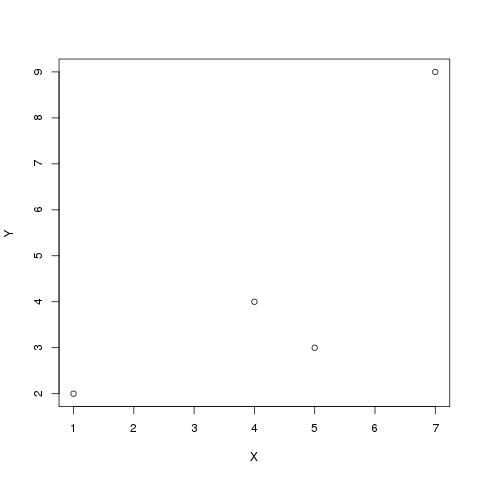

In [40]:
%%R 
X = c(1,4,5,7)
Y = c(2,4,3,9)
plot(X, Y)

In [58]:
%%R
install.packages('ggplot2')
install.packages('dplyr')
install.packages('tidyr')

In [61]:
%%R
packageVersion('ggplot2')

[1] ‘2.2.1’


In [62]:
%%R
packageVersion('dplyr')

[1] ‘0.7.6’


In [63]:
%%R
packageVersion('tidyr')

[1] ‘0.8.1’


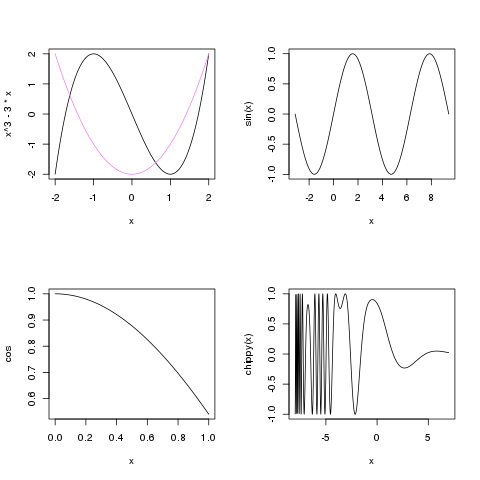

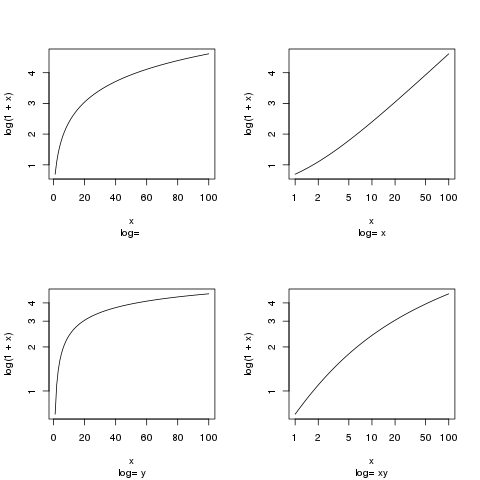

In [64]:
%%R
par(mfrow=c(2,2))
curve(x^3-3*x, -2, 2)
curve(x^2-2, add = TRUE, col = "violet")

curve(sin, -pi, 3*pi)
plot(cos)
chippy <- function(x) sin(cos(x)*exp(-x/2))
curve(chippy, -8, 7, n=2001)

for(ll in c("","x","y","xy"))
   curve(log(1+x), 1,100, log=ll, sub=paste("log=",ll))

In [1]:
name = 2

In [6]:
%R name = 3  
%R name

array([3.])

UsageError: Line magic function `%bash` not found (But cell magic `%%bash` exists, did you mean that instead?).
